In [1]:
import keras
from keras import backend as K
from keras import layers, regularizers, callbacks
from keras.models import load_model

import tensorflow as tf
import random

import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, hamming_loss

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
keras.__version__

'2.3.1'

In [3]:
tf.__version__

'2.2.0'

In [4]:
random.seed(42)

# label load

In [5]:
test_X = pd.read_excel('./data/paper_test.xlsx')
test_X = test_X.drop(['Unnamed: 0', 'abstract'], axis=1)
test_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
one_hot_test_labels = np.array(test_X)
print(one_hot_test_labels)
print(one_hot_test_labels.shape)

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(935, 262)


# decoder load

In [7]:
#decoder = load_model('./save_models/ae/stacked_decoder_v7.h5')

In [8]:
decoder = load_model('./save_models/decoder_models/residual_decoder_v18.h5')

C:\Users\user\.conda\envs\mlc\lib\site-packages\keras\engine\saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [9]:
pred = pd.read_excel('./pred_rae_v6.xlsx')
pred = pred.drop(['Unnamed: 0'], axis=1)
pred

,0,1,2,3
0,0.536599,0.487573,0.375146,0.476029
1,0.512921,0.500585,0.380210,0.472656
2,0.530575,0.490968,0.381909,0.473533
3,0.511842,0.494990,0.386171,0.479709
4,0.512349,0.498587,0.377209,0.475513
...,...,...,...,...
930,0.532246,0.486556,0.381665,0.478991
931,0.534095,0.486465,0.378260,0.478489
932,0.532926,0.490338,0.378885,0.473407
933,0.532906,0.485575,0.380436,0.480061


In [10]:
test_decode = decoder.predict(np.array(pred))
test_decode

array([[5.0264232e-05, 9.0725101e-05, 3.6693981e-01, ..., 1.2251550e-06,
        1.3249302e-01, 7.5369526e-04],
       [3.4885183e-05, 7.6144366e-05, 3.4680560e-01, ..., 6.4474597e-07,
        1.6419458e-01, 1.0416906e-03],
       [3.5461777e-05, 7.1216753e-05, 2.8568283e-01, ..., 9.1219016e-07,
        1.4468403e-01, 6.9115212e-04],
       ...,
       [4.2030377e-05, 7.9789948e-05, 3.2126015e-01, ..., 1.0510714e-06,
        1.4013100e-01, 7.1753009e-04],
       [3.4861408e-05, 7.1542934e-05, 2.9528052e-01, ..., 9.1117306e-07,
        1.3898295e-01, 7.0879073e-04],
       [5.7421421e-05, 9.6009535e-05, 3.6933801e-01, ..., 1.3705298e-06,
        1.3956168e-01, 7.2922563e-04]], dtype=float32)

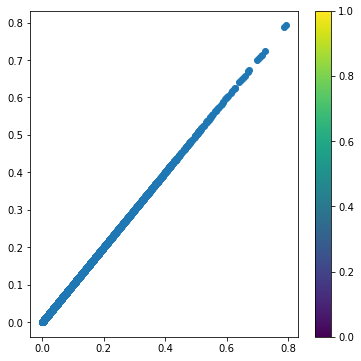

In [11]:
plt.figure(figsize=(6, 6))
plt.scatter(test_decode[:, :], test_decode[:, :])
plt.colorbar()
plt.show()

In [12]:
"""test_predict = test_decode.round()
test_predict"""

'test_predict = test_decode.round()\ntest_predict'

In [13]:
test_predict = test_decode.round()
test_predict

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
"""test_predict = np.where(test_decode > 0.5, 1, 0)
test_predict"""

'test_predict = np.where(test_decode > 0.5, 1, 0)\ntest_predict'

In [15]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [16]:
#c_matrix.shape

In [17]:
#c_matrix

In [18]:
print('accuracy : ', accuracy_score(one_hot_test_labels, test_predict))
print('precision : ', precision_score(one_hot_test_labels, test_predict, average='micro'))
print('recall : ', recall_score(one_hot_test_labels, test_predict, average='micro'))
print('f1 : ', f1_score(one_hot_test_labels, test_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_test_labels, test_predict))

accuracy :  0.0
precision :  0.014084507042253521
recall :  0.0006020469596628537
f1 :  0.0011547344110854505
------------------------
hamming_loss :  0.007062089235416582


In [19]:
"""test_predict_df = pd.DataFrame(test_predict)
test_predict_df"""

'test_predict_df = pd.DataFrame(test_predict)\ntest_predict_df'

In [20]:
#test_predict_df.to_excel('./test_latent_vector.xlsx')